
=== Cross-Tabulation Table ===
+----------+----------+--------------+-------------+
|   labels |   setosa |   versicolor |   virginica |
+==========+==========+==============+=============+
|        0 |        0 |           46 |          50 |
+----------+----------+--------------+-------------+
|        1 |       33 |            0 |           0 |
+----------+----------+--------------+-------------+
|        2 |       17 |            4 |           0 |
+----------+----------+--------------+-------------+



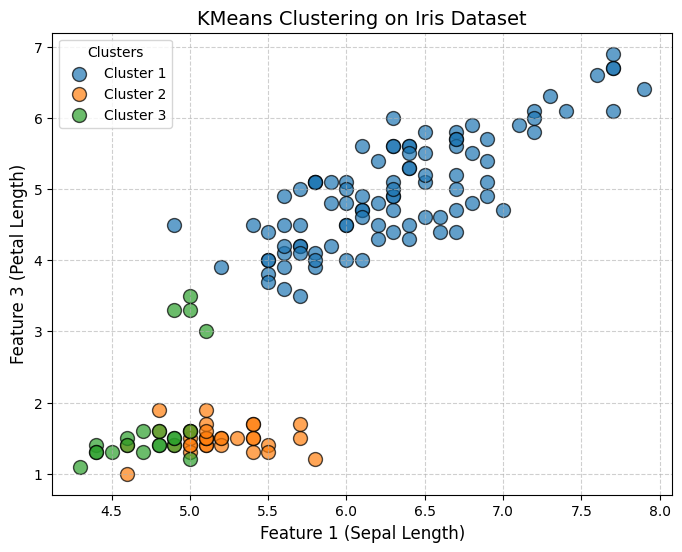


=== Model Performance ===
Model Inertia: 191.02


In [1]:
# ===================== KMeans Clustering on the Iris Dataset =====================
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
samples = iris.data
species = iris.target_names[iris.target]

# Create a pipeline (Scaling and KMeans clustering)
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, random_state=42)
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to the data and predict clusters
pipeline.fit(samples)
labels = pipeline.predict(samples)

# Store the results in a DataFrame
df = pd.DataFrame({'labels': labels, 'species': species})

# Create a cross-tabulation table
ct = pd.crosstab(df['labels'], df['species'])

# Print the cross-tabulation table with formatting
print("\n\033[1m=== Cross-Tabulation Table ===\033[0m")
print(tabulate(ct, headers='keys', tablefmt='grid'), end="\n\n")

# Define cluster label names
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# Visualize the data
plt.figure(figsize=(8, 6))
for i, cluster_name in enumerate(cluster_names):
    plt.scatter(
        samples[labels == i, 0],
        samples[labels == i, 2],
        label=cluster_name,
        edgecolor='k',
        s=100,
        alpha=0.7
    )

plt.title('KMeans Clustering on Iris Dataset', fontsize=14)
plt.xlabel('Feature 1 (Sepal Length)', fontsize=12)
plt.ylabel('Feature 3 (Petal Length)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Clusters', fontsize=10)
plt.show()

# Evaluate model performance (inertia)
print("\n\033[1m=== Model Performance ===\033[0m")
print(f"\033[94mModel Inertia: \033[30m{kmeans.inertia_:.2f}\033[0m")

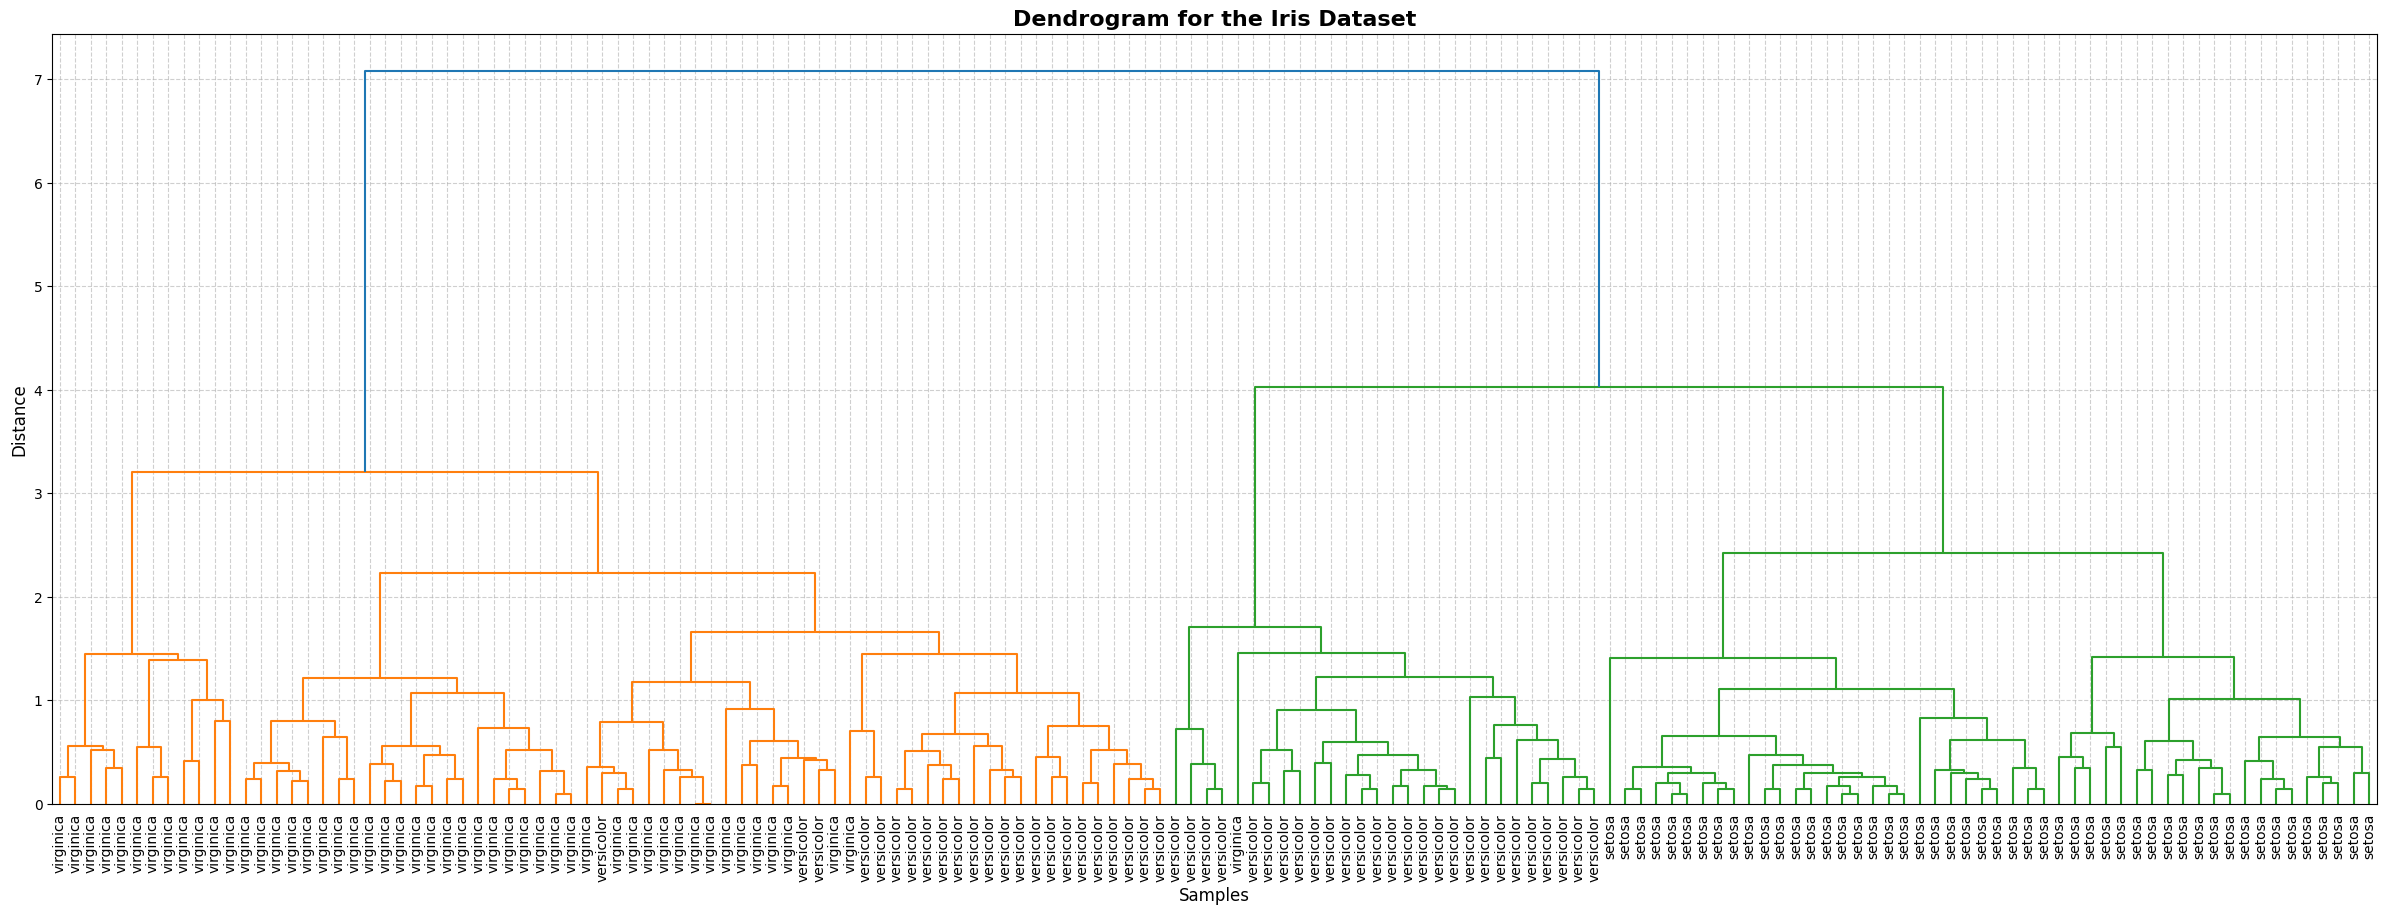


Clustered Samples:

 Cluster Label Sample Name
             1  versicolor
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1   virginica
             1  versicolor
             1  versicolor
             1  versicolor
             1  versicolor
             1   virginica
             1   virginica
             1   virginica
             1   virginica
             1   virginica
       

In [2]:
# ===================== Hierarchical Clustering on the Iris Dataset =====================
import matplotlib.pyplot as plt
import pandas as pd

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

# Perform hierarchical clustering
mergings = linkage(data, method='complete')

# Create and customize the dendrogram
plt.figure(figsize=(30, 10))
dendrogram(
    mergings,
    labels=iris.target_names[iris.target],  # Convert labels to target names
    leaf_rotation=90,  # Rotate the labels for better readability
    leaf_font_size=10  # Increase font size for clarity
)
plt.title('Dendrogram for the Iris Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Determine cluster labels
cluster_labels = fcluster(mergings, t=5, criterion='distance')

# Store results in a DataFrame
results = pd.DataFrame({
    'Cluster Label': cluster_labels,
    'Sample Name': iris.target_names[iris.target]
})

# Sort results by cluster labels
sorted_results = results.sort_values(by='Cluster Label')

# Display results
print("\nClustered Samples:\n")
print(sorted_results.to_string(index=False))

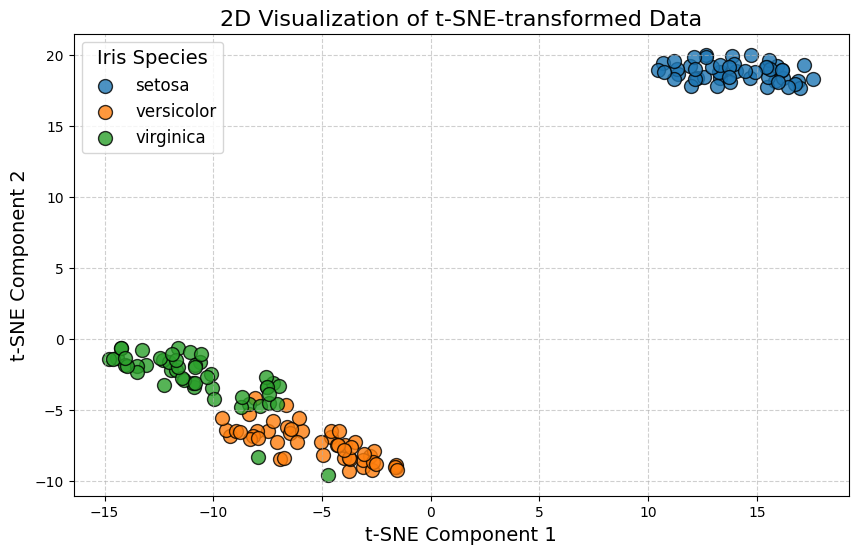

In [3]:
# ===================== t-SNE Visualization on the Iris Dataset =====================
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

# Load the dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Create the t-SNE model and reduce data to two dimensions
model = TSNE(learning_rate=100, random_state=42)
transformed = model.fit_transform(data)

# Visualize the transformed data in 2D
plt.figure(figsize=(10, 6))
class_names = iris.target_names
colors = ['red', 'green', 'blue']

# Plot each class with a specific color and label
for class_idx, class_name in enumerate(class_names):
    class_points = transformed[labels == class_idx]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=class_name, s=100, edgecolor='black', alpha=0.8)

plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.title('2D Visualization of t-SNE-transformed Data', fontsize=16)
plt.legend(title="Iris Species", fontsize=12, title_fontsize=14, loc='best')
plt.grid(linestyle='--', alpha=0.6)
plt.show()

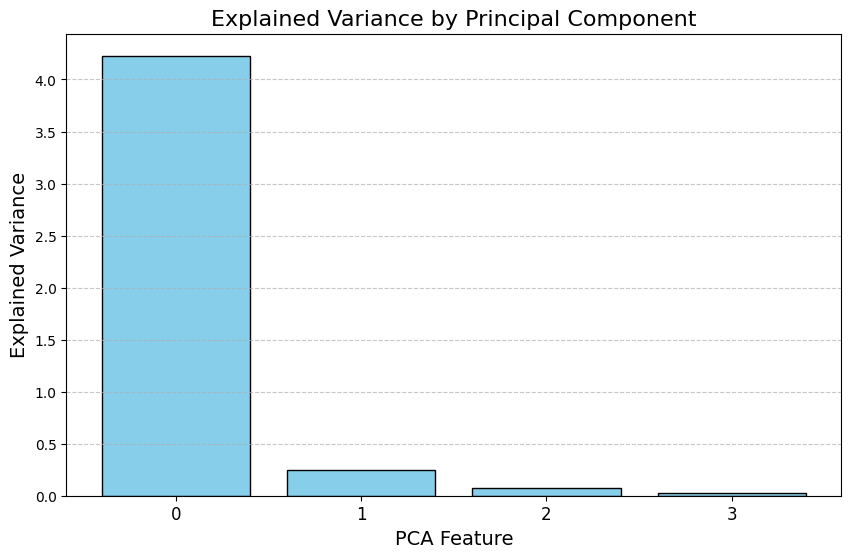

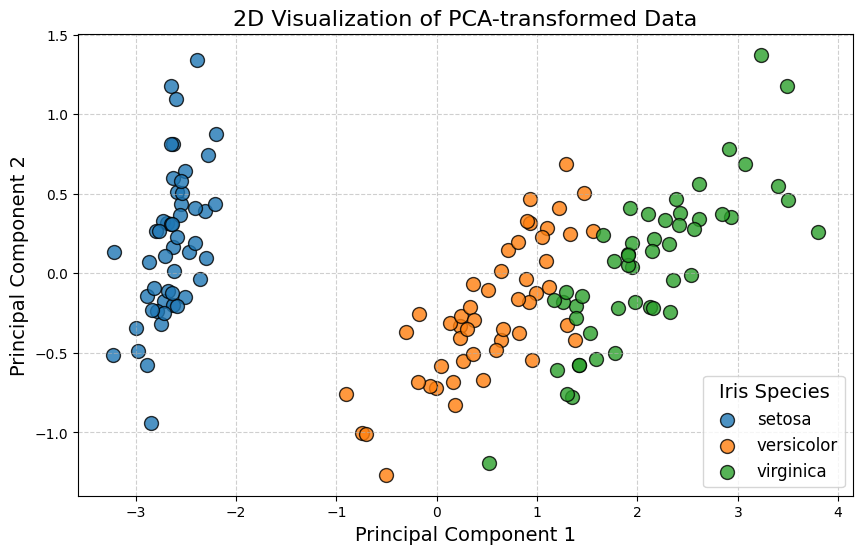


Shape of transformed data: (150, 2)

PCA components (weights of original features in each principal component):
Principal Component 1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Principal Component 2: [ 0.65658877  0.73016143 -0.17337266 -0.07548102]


In [4]:
# ===================== PCA Dimension Reduction on the Iris Dataset =====================
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset (features and target labels)
data = load_iris()
samples = data.data  # Feature matrix
species = data.target  # Target labels

# Fit PCA model to the data
pca = PCA()  # Initialize PCA model
pca.fit(samples)  # Fit the PCA model

# Visualize the explained variance for each principal component
features = range(pca.n_components_)
plt.figure(figsize=(10, 6))
plt.bar(features, pca.explained_variance_, color='skyblue', edgecolor='black')
plt.xticks(features, fontsize=12)
plt.ylabel('Explained Variance', fontsize=14)
plt.xlabel('PCA Feature', fontsize=14)
plt.title('Explained Variance by Principal Component', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Reduce dimensionality to 2 components
pca_2d = PCA(n_components=2)  # Initialize PCA with 2 components
transformed = pca_2d.fit_transform(samples)  # Fit and transform the data

# Visualize the transformed data in 2D
xs = transformed[:, 0]  # First principal component
y = transformed[:, 1]  # Second principal component

# Scatter plot of the data in 2D space
plt.figure(figsize=(10, 6))
class_names = data.target_names
colors = ['red', 'green', 'blue']

# Plot each class with a specific color and label
for class_idx, class_name in enumerate(class_names):
    class_points = transformed[species == class_idx]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=class_name, s=100, edgecolor='black', alpha=0.8)

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('2D Visualization of PCA-transformed Data', fontsize=16)
plt.legend(title="Iris Species", fontsize=12, title_fontsize=14, loc='best')
plt.grid(linestyle='--', alpha=0.6)
plt.show()

# Print the shape of the transformed data and PCA components with better formatting
print("\n\033[1mShape of transformed data:\033[0m", transformed.shape)
print("\n\033[1mPCA components (weights of original features in each principal component):\033[0m")
for i, component in enumerate(pca_2d.components_):
    print(f"\033[94mPrincipal Component {i+1}:\033[0m {component}")

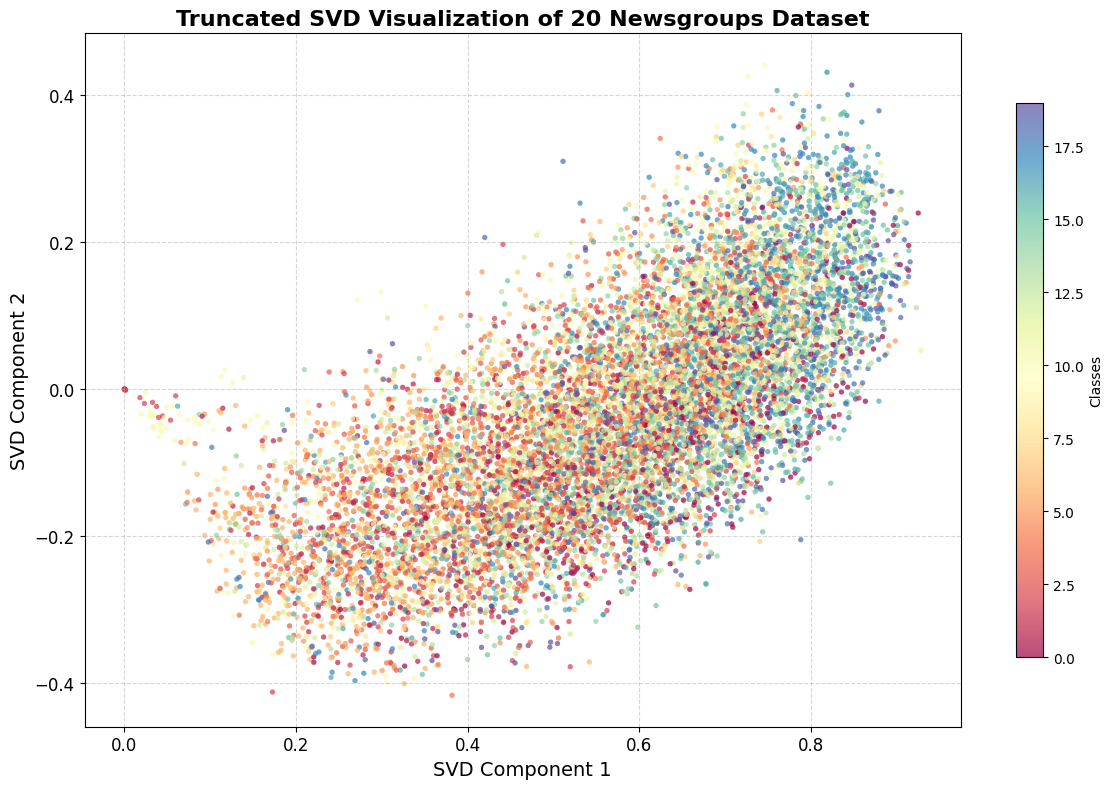


Explained Variance Ratio by Each Component:
[0.04812934 0.03302235]


In [5]:
# ===================== Truncated SVD with the 20 Newsgroups Dataset =====================
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups_vectorized

# Load a suitable dataset (20 Newsgroups vectorized dataset)
data = fetch_20newsgroups_vectorized()
samples = data.data  # Feature matrix
labels = data.target  # Target labels

# Initialize TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)
transformed = svd.fit_transform(samples)  # Fit and transform the data

# Extract the reduced dimensions
xs = transformed[:, 0]
ys = transformed[:, 1]

# Visualization of the reduced data in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(xs, ys, c=labels, cmap='Spectral', s=15, alpha=0.7, edgecolors='none')

# Enhance the plot with labels and a colorbar
plt.colorbar(scatter, label='Classes', orientation='vertical', shrink=0.8)
plt.title("Truncated SVD Visualization of 20 Newsgroups Dataset", fontsize=16, fontweight='bold')
plt.xlabel("SVD Component 1", fontsize=14)
plt.ylabel("SVD Component 2", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print explained variance ratio
print("\n\033[1mExplained Variance Ratio by Each Component:\033[0m")
print(svd.explained_variance_ratio_)

In [6]:
# ===================== NMF with the 20 Newsgroups Dataset =====================
import pandas as pd

from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Load a suitable dataset (20 Newsgroups dataset)
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
articles = data.data  # Collection of text articles
titles = [f"Article {i+1}" for i in range(len(articles))]

# Transform text data into a TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(articles)

# Apply NMF to the TF-IDF matrix
nmf = NMF(n_components=6, random_state=42)  # Reduce to 6 topics
nmf_features = nmf.fit_transform(tfidf_matrix)

# Normalize the NMF features for similarity calculations
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, index=titles)

# Example: Find similarities for a specific article
# Replace 'Article 23' with the desired article index or title
current_article = df.loc['Article 23']
similarities = df.dot(current_article)

# Print top 5 most similar articles
print("\033[1mTop 5 Similar Articles:\033[0m")
print(similarities.nlargest(5))

# Print NMF components (topics)
print("\n\033[1mNMF Components (Topics):\033[0m")
for i, topic in enumerate(nmf.components_):
    top_words = [vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-10:]]
    print(f"\033[94mTopic {i+1}:\033[0m", ", ".join(top_words))

Top 5 Similar Articles:
Article 23      1.000000
Article 7094    0.997855
Article 8484    0.997733
Article 4498    0.997080
Article 4239    0.996871
dtype: float64

NMF Components (Topics):
Topic 1: good, government, know, time, right, like, think, just, don, people
Topic 2: looking, hi, info, email, advance, edu, mail, does, know, thanks
Topic 3: church, sin, christians, faith, christian, christ, believe, bible, jesus, god
Topic 4: bus, monitor, controller, drives, ide, hard, disk, card, scsi, drive
Topic 5: win, play, baseball, season, players, hockey, year, games, team, game
Topic 6: problem, version, using, window, use, files, program, dos, file, windows
